# تحليل بسيط لتحويلات العملاء

Author : Mohammed Mahdi (@Muh3ammed)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## قراءة البيانات

In [2]:
df = pd.read_excel('../data/ANZ.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


## معلومات عن البيانات

23 عمود

12043 سطر

هناك قيم مفقودة في بعض الاعمدة

انواع البيانات صحيحة

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

## ما هي الاعمدة الموجودة في البيانات؟

In [4]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

## نحذف الاعمدة التي لا نحتاجها و التي فيها قيم مفقودة كثيرة

In [5]:
df.drop(columns=['bpay_biller_code', 'merchant_long_lat', 'long_lat', 'merchant_code', 'merchant_id'], inplace=True)
df.head()

,status,card_present_flag,account,currency,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement
0,authorized,1.0,ACC-1598451071,AUD,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit
1,authorized,0.0,ACC-1598451071,AUD,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit
2,authorized,1.0,ACC-1222300524,AUD,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit
3,authorized,1.0,ACC-1037050564,AUD,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit
4,authorized,1.0,ACC-1598451071,AUD,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit


## وصف احصائي بسيط للبيانات

ممكن ان نرى متوسط الاعمار, الرصيد, التحويلات و ما هو حجم الرصيد او التحويلات

الاعمار من 18 الى 78

متوسط الاعمار هو 30

اعلى رصيد هو 267128.52

اعلى عملية تحويل هي 8835.98

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
card_present_flag,7717.0,0.802644,0.398029,0.00,1.000,1.00,1.000,1.00
balance,12043.0,14704.195553,31503.722652,0.24,3158.585,6432.01,12465.945,267128.52
age,12043.0,30.582330,10.046343,18.00,22.000,28.00,38.000,78.00
amount,12043.0,187.933588,592.599934,0.10,16.000,29.00,53.655,8835.98


## ما هي عدد القيم المفقودة؟

ممكن ان نستبدل القيم المفقودة ب القيم الاكثر تكرار

In [8]:
df.isna().sum()

status                  0
card_present_flag    4326
account                 0
currency                0
txn_description         0
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
movement                0
dtype: int64

##  لنستبدل القيم المفقودة ب القيم الاكثر تكرارا

In [9]:
to_fillna_with_mode = ['card_present_flag', 'merchant_suburb', 'merchant_state']

for col in to_fillna_with_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [10]:
df.isna().sum()

status               0
card_present_flag    0
account              0
currency             0
txn_description      0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
country              0
customer_id          0
movement             0
dtype: int64

##  ما هي عدد الاسطر المكررة؟

In [11]:
df.duplicated().sum()

0

## نضرة بسيطة على البيانات الفئوية

In [12]:
cat_columns = df.select_dtypes(include='object').columns

for col in cat_columns:
    print(df[col].value_counts())
    print('\n' + '*' * 50 + '\n')

authorized    7717
posted        4326
Name: status, dtype: int64

**************************************************

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

**************************************************

AUD    12043
Name: currency, dtype: int64

**************************************************

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

**************************************************

Michael      746
Diana        578
Jessica      408
Joseph       391
Jeffrey      388
            ... 
Cindy         51
Elizabeth     44
David         40
Andrew        34
Jonathan      31
Name: first_name, Length: 80, dtype: int64

*****************

## رسم بياني بسيط يوضح لنا توزيع البيانات الفئوية

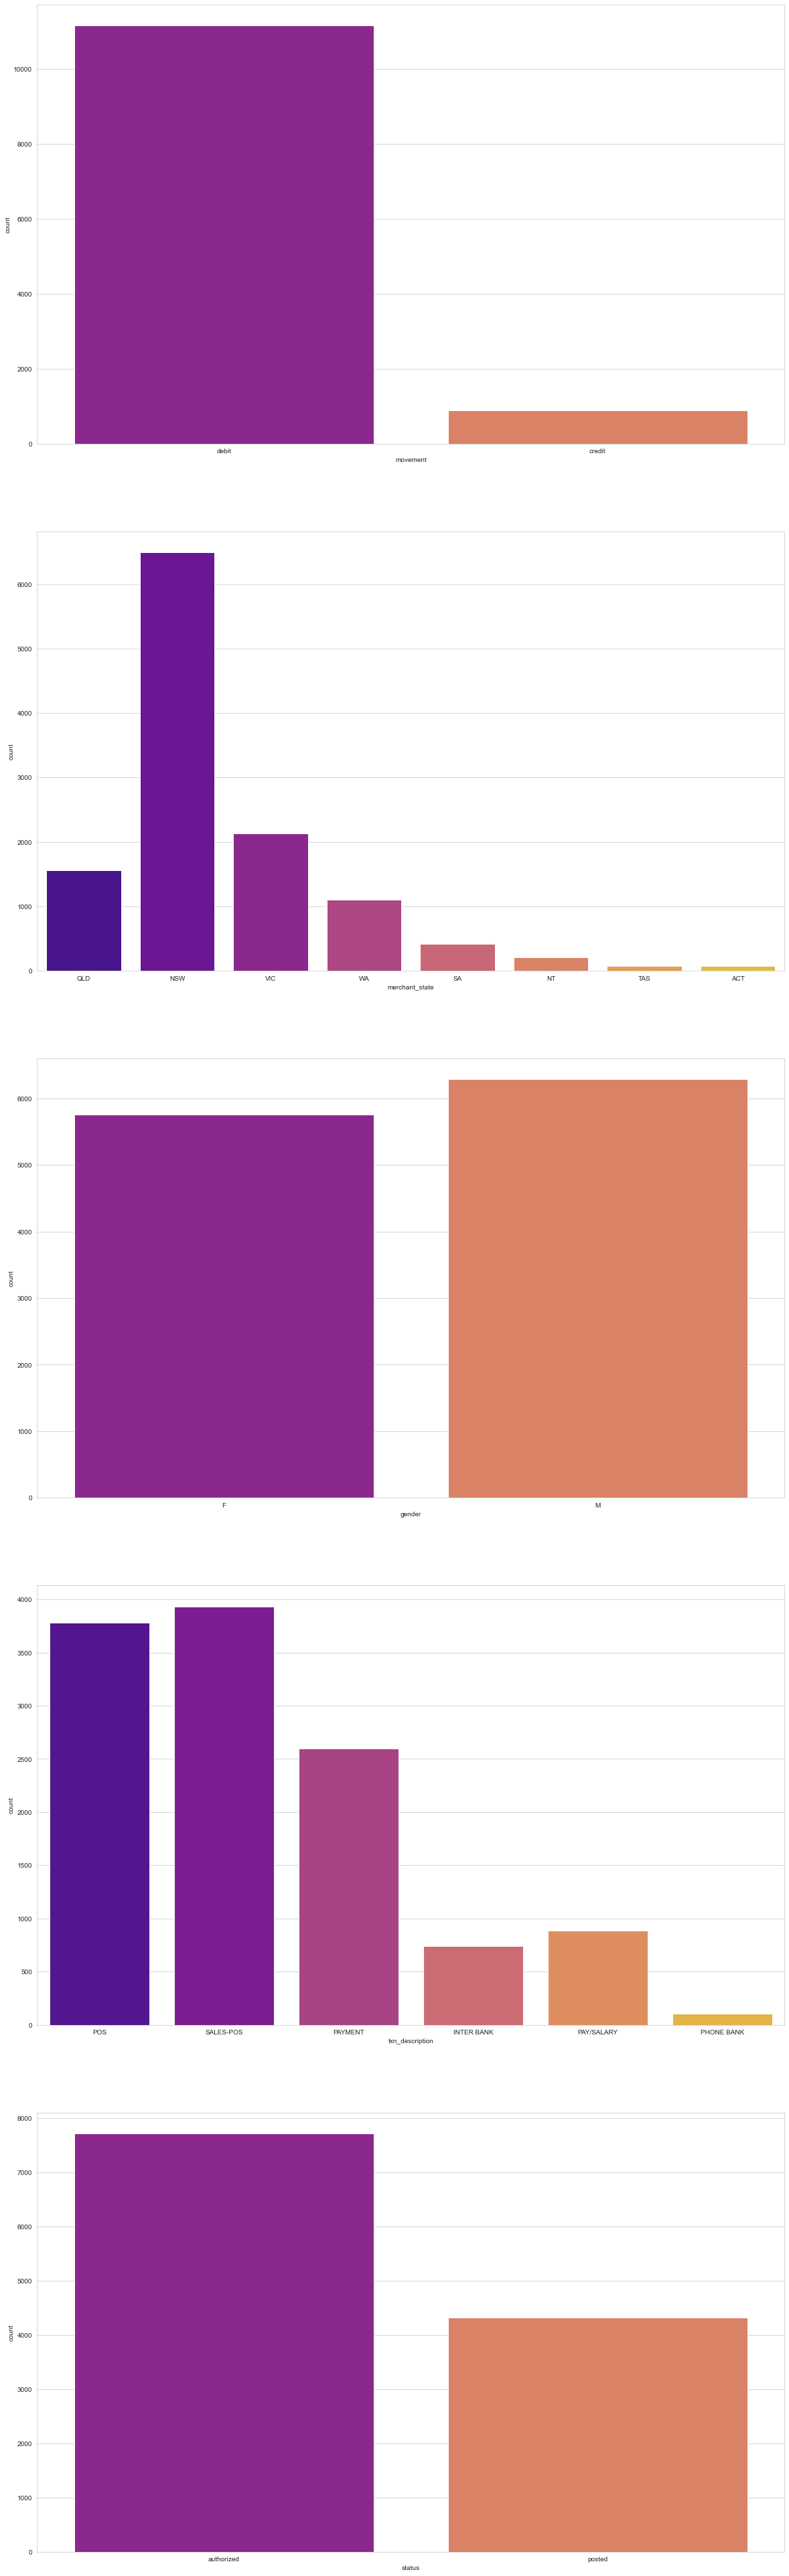

In [13]:
cat_cols_to_plot = ['movement', 'merchant_state', 'gender', 'txn_description', 'status']

sns.set_style('whitegrid')  
fig, ax = plt.subplots(len(cat_cols_to_plot), 1, figsize=(20,70))

for x, col in enumerate(cat_cols_to_plot):
    sns.countplot(x=df[col], ax=ax[x], palette='plasma')

## ما هي توزيعات البيانات الرقمية؟

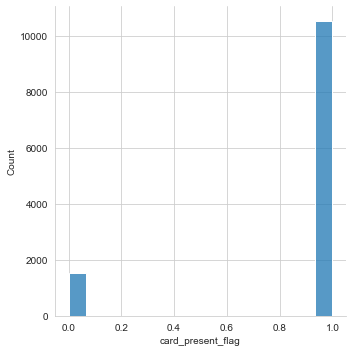

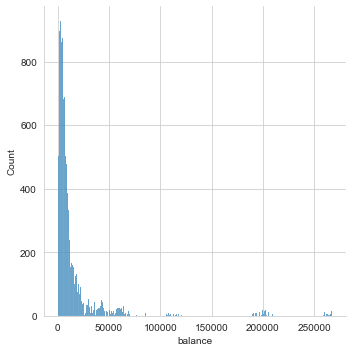

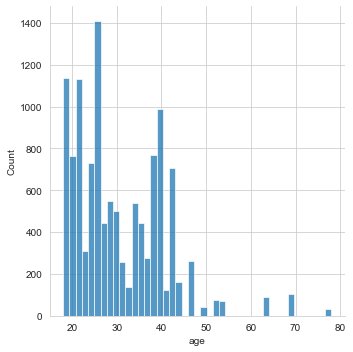

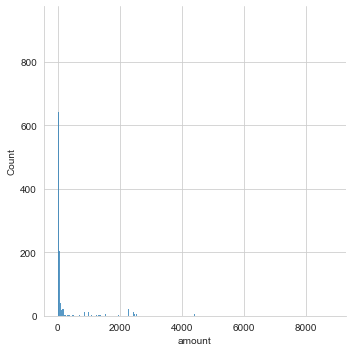

In [14]:
for col in df.select_dtypes(include='number').columns:
        sns.displot(x=df[col])

## التحويلات حسب التاريخ

نلاحظ ان هناك يوم في كل شهر تتم التحويلات فيه بشكل اكبر و تقريبا ما بين يوم 18 و 19

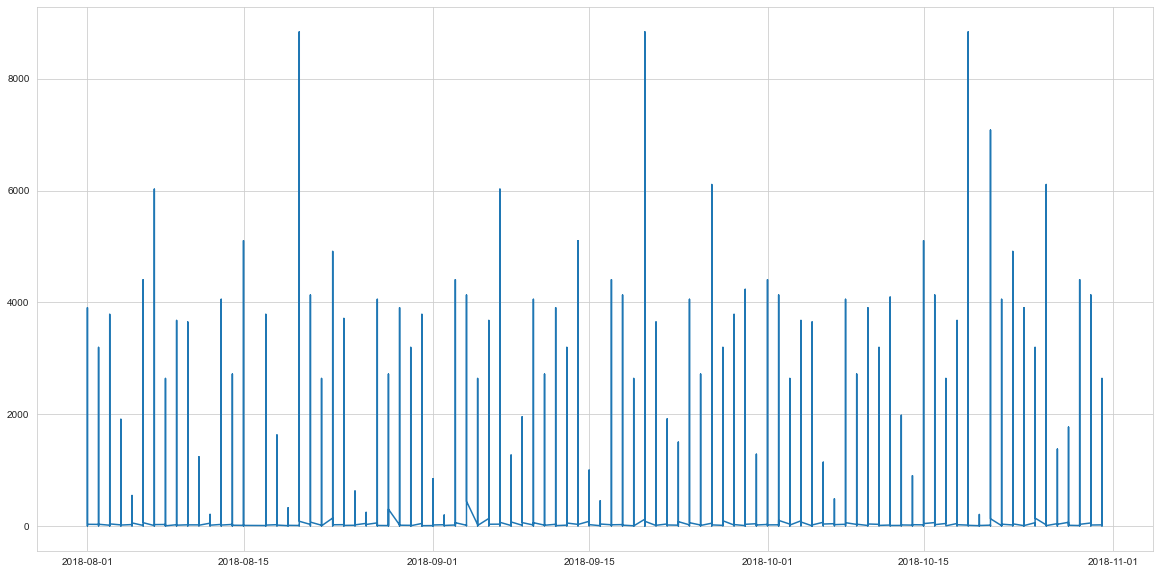

In [16]:
plt.figure(figsize=(20,10))
plt.plot(df['date'], df['amount']);

## من هو صاحب اعلى التحويلات؟

نفس الشخص بنفس الحجم 4 مرات

و بلنظر الى تاريخ التحويلات نرى في كل 19 او 20 بلشهر يعمل هذه التحويلات

In [22]:
df[df['amount'] == df['amount'].max()][['status', 'account', 'date', 'first_name', 'gender', 'movement', 'amount']]

,status,account,date,first_name,gender,movement,amount
2401,posted,ACC-1523339231,2018-08-20,Tim,M,credit,8835.98
6529,posted,ACC-1523339231,2018-09-20,Tim,M,credit,8835.98
10429,posted,ACC-1523339231,2018-10-19,Tim,M,credit,8835.98
10430,posted,ACC-1523339231,2018-10-19,Tim,M,credit,8835.98


## من هم  اصحاب ادنى التحويلات؟

In [28]:
df[df['amount'] == df['amount'].min()]

,status,card_present_flag,account,currency,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement
5395,authorized,0.0,ACC-211792489,AUD,SALES-POS,Jacqueline,6090.60,2018-09-12,F,30,Melbourne,VIC,2018-09-12T09:02:37.000+0000,0.1,daab7b7e1e5c4503b87d96358d9b4bee,Australia,CUS-497688347,debit
6428,authorized,1.0,ACC-3541460373,AUD,POS,Jeffrey,3281.56,2018-09-19,M,24,Southbank,VIC,2018-09-19T17:21:28.000+0000,0.1,392deeb7fff748f48b19ad95381e8aa2,Australia,CUS-1433879684,debit
6592,authorized,1.0,ACC-2265520058,AUD,POS,Catherine,3103.82,2018-09-20,F,26,Woollahra,NSW,2018-09-20T21:49:05.000+0000,0.1,dd9a6c8d1c454705a62e7a67592698be,Australia,CUS-331942311,debit
8188,authorized,1.0,ACC-1598451071,AUD,SALES-POS,Diana,2705.97,2018-10-03,F,26,Broadbeach,QLD,2018-10-03T03:19:59.000+0000,0.1,4f3a5aff070e43fcaeebd0ae0cd24caa,Australia,CUS-2487424745,debit
11523,authorized,0.0,ACC-3771436525,AUD,SALES-POS,Derek,7715.69,2018-10-27,M,20,Malvern,VIC,2018-10-27T18:53:02.000+0000,0.1,cce50d62571a417f8df6f74e9e11072c,Australia,CUS-3325710106,debit


## هل النساء ام الرجال الاكثر تحويلا للمبالغ المالية؟

الرجال هم الاكثر تحويلا 

اكبر حجم للنساء هو 7081

اكبر حجم للرجال هو 8835

In [25]:
df.groupby('gender').describe()['amount']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,5758.0,168.517303,525.177524,0.1,15.32,27.58,51.385,7081.09
M,6285.0,205.721809,647.774391,0.1,16.68,30.00,55.780,8835.98


## من هو صاحب اعلى رصيد؟

In [27]:
df[df['balance'] == df['balance'].max()]

,status,card_present_flag,account,currency,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement
10467,posted,1.0,ACC-2014856841,AUD,PAY/SALARY,Patrick,267128.52,2018-10-19,M,46,Melbourne,NSW,2018-10-19T17:00:00.000+0000,2179.96,a6ac361f68cf4442804fa8aa785b3ac7,Australia,CUS-2370108457,credit


## ما هي الوسيلة الاكثر استخداما؟

debit vs credit

نلاحظ فارق كبير بعدد الاستخدام

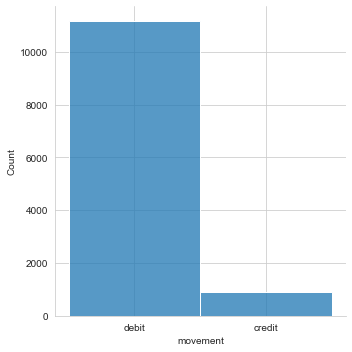

In [32]:
sns.displot(df['movement']);

## ما هي المدينة التي يوجد بها تحويلات اكثر؟

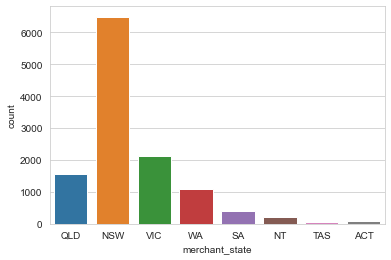

In [40]:
sns.countplot(x='merchant_state', data=df);